# Predict a car price in Ukraine 2020

## Introduction

This project analyses used cars data from Ukrainian automobile online portal "auto.ria.com".

The goal of this project is to perform an exploratory data analysis of the given dataset and bild a model for a car's price prediction.

## Data sources

vehicle_price(2020).csv was downloaded from https://www.kaggle.com/dimakyn/vehicles-price-2020-ukraine

Last updated 2020-01-08

## Project Goals

The used cars market is highly developed in Ukraine. According to Ukrainian Automobile Association, sales of used cars in Ukraine were five times higher then new cars sales in 2019 (https://bit.ly/35DicYM). 
It would be very useful for a Ukrainian car driver to have a model that can predict a fair price for bying or selling a used car.

## Import Python Modules
Here you can see Python modules that will be used in this project:

In [2]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [25, 10]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import re
from sklearn.preprocessing import scale

## Loading the data
Here I will load the initial datafile "vehicle_price(2020).csv" into the Pandas DataFrame in order to analyse it using Python modules. I print df.head(10) in order to see 10 first raws of data

In [3]:
df = pd.read_csv('vehicle_price(2020).csv', encoding='utf-8')
df.head(10)

,brand,model,year,body,price$,car_mileage,fuel,power,transmission
0,ford,transit,2006,other,5 350,220,diesel,2.0,manual
1,renault,master,2017,other,17 000,211,diesel,2.3,manual
2,opel,vivaro,2015,other,15 200,157,diesel,1.6,manual
3,ford,transit,2000,other,4 999,300,diesel,2.4,manual
4,mercedes-benz,sprinter,2010,other,20 700,682,diesel,3.0,automatic
5,tesla,model,2017,other,68 888,39,NaN,NaN,other
6,volkswagen,t4,2002,other,12 900,270,diesel,2.5,manual
7,bmw,530,2000,other,6 999,331,diesel,3.0,automatic
8,volkswagen,caddy,2004,other,7 300,230,diesel,1.9,manual
9,opel,vivaro,2007,other,8 500,180,diesel,2.5,manual


## Data characteristics
This datafile has 22866 raws in 9 columns

The columns have the following data:
* **brand**: categorical variable of a car brand (ford, renault, opel)
* **model**: categorical variable of a car model (transit, sprinter, caddy)
* **year**: continuous variable of a manufacturing year (2006, 2010, 2017)
* **body**: categorical variable of a car's body type (sedan', 'coupe', 'minivan')
* **price$**: continuous variable of a car price in USD('5 350', '1 100', '2 200')
* **car_mileage**: continuous variable of a car_mileage in km*1000 (220, 211, 39)
* **fuel**: categorical variable of a fuel type ('diesel', 'petrol', 'gas')
* **power**: continuous variable of engine's cylinders volume (2.0, 3.0, 3.5)
* **transmission**: categorical variable of transmission typt ('manual', 'automatic', 'typtronik')

We can see that some data is missing in columns 'fuel' (21140 Non-Null values instead of 22867), 'power', and 'transmission', but this is not critical since the amount of available data is enough for building a model for price prediction.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22867 entries, 0 to 22866
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         22867 non-null  object 
 1   model         22867 non-null  object 
 2   year          22867 non-null  int64  
 3   body          22867 non-null  object 
 4   price$        22867 non-null  object 
 5   car_mileage   22867 non-null  int64  
 6   fuel          21140 non-null  object 
 7   power         21464 non-null  float64
 8   transmission  22593 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.6+ MB


## Data exploration
First, let's find the amount of unique values in some of our columns. This is important to know for the future exploratory analysis and prediction midel design. 


We will do this using `df.'column_name'.nunique()` command. We will not explore prices and mileage columns since the amount of unique values will be very high.

In [5]:
df.brand.nunique()

93

In [6]:
df.model.nunique()

916

In [7]:
df.year.nunique()

59

In [8]:
df.body.nunique()

12

In [9]:
df.fuel.nunique()

3

In [10]:
df.power.nunique()

125

In [11]:
df.transmission.nunique()

5

## Data cleaning
Before we can start working with data we have to clean it so we will have no problems with applying different algorithms.

First, values in the price column are objects, but we will need an integer for better usability. Also, the column name is using a special character price$ which can cause troubles in future. So we need to rename the column name and change the values to integers.

As the last step, we should remove missing data (nulls and NaN).

P.S. During the data cleaning I found one string value **"договірна"** in the **"price_usd"** column, which means "price by deal". So I head to remove it too in order to process my algorithms.

In [12]:
df.rename(columns={"price$": "price_usd"}, inplace=True)
df['price_usd'] = df['price_usd'].str.replace(" ","")
df = df[df.price_usd != 'договірна']
df['price_usd'] = df['price_usd'].astype(int)

columns = ['brand', 'model', 'year', 'body', 'price_usd', 'car_mileage', 'fuel',
       'power', 'transmission']
df = df[columns].dropna().reset_index()


print(df.info())

#Making sure I don't have zero values in my 'price_usd' column.
price_list = df['price_usd'].unique()
price_list.sort()
print(price_list)
print(df[df.price_usd == 0])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20909 entries, 0 to 20908
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         20909 non-null  int64  
 1   brand         20909 non-null  object 
 2   model         20909 non-null  object 
 3   year          20909 non-null  int64  
 4   body          20909 non-null  object 
 5   price_usd     20909 non-null  int32  
 6   car_mileage   20909 non-null  int64  
 7   fuel          20909 non-null  object 
 8   power         20909 non-null  float64
 9   transmission  20909 non-null  object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 1.5+ MB
None
[   100    350    400 ... 474781 491139 665000]
Empty DataFrame
Columns: [index, brand, model, year, body, price_usd, car_mileage, fuel, power, transmission]
Index: []


**After all manipulations, we have 20909 rows of clean data, which is still good for futher analysis.**

## Exploratory analysis
Let's perform some simple visualization of our data.

In the beginning, let's look at the prices distribution.

The median price is 9 400 USD, but there are many outliers up to 100 000 USD and more.

Mean: 14327.07480032522
Median: 9400.0
Mode: 0    6500
dtype: int32
Quartiles: [ 6250.  9400. 14900.]


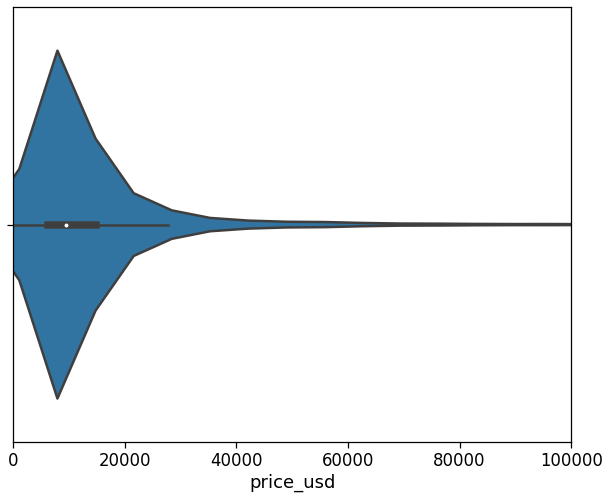

In [13]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10, 8))
sns.violinplot(x=df["price_usd"])
#plt.ylim(0, None)
plt.xlim(0, 100000)

#Basic statistics
print(f'Mean: {df.price_usd.mean()}')
print(f'Median: {df.price_usd.median()}')
print(f'Mode: {df.price_usd.mode()}')
print(f'Quartiles: {np.quantile(df.price_usd, [0.25, 0.5, 0.75])}')



**As you can see, there are many outliers in the dataset, so price for a used car can rise up to 600 000 USD! But we should consider the possibility, that the seller entered the price in UAH, which is Ukrainian national currency. 1 UAH = 0.036 USD**

(0.0, 5.0)

<Figure size 1440x576 with 0 Axes>

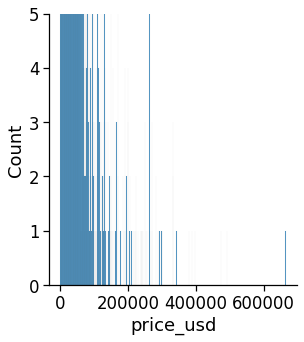

In [14]:
plt.figure(figsize=(20, 8))
sns.displot(data=df, x="price_usd", bins=1000)
plt.ylim(0, 5)


## Most popular brand
Let's find out which brand was the most popular one in 2020. Volkswagen holds the first place with a great margin from the closest neighbour. Renault and Mercedes-Benz are second and third, respectively.

<AxesSubplot:xlabel='count', ylabel='brand'>

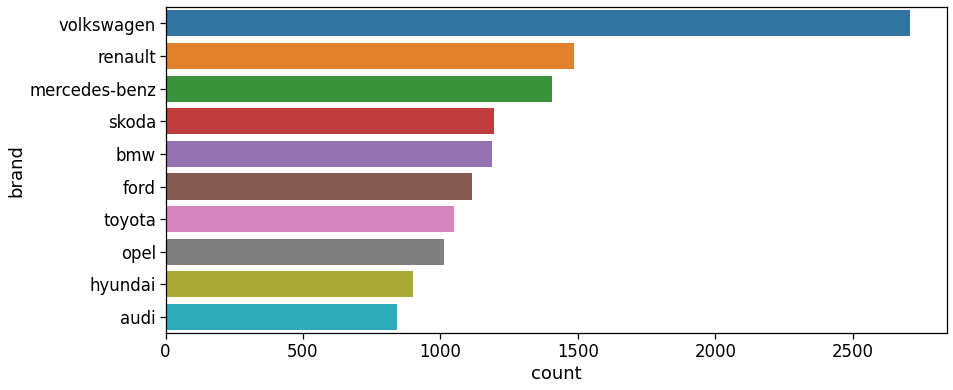

In [15]:
plt.figure(figsize=(14, 6))
sns.countplot(y="brand", data=df, order = df['brand'].value_counts().iloc[:10].index)
#plt.ylim(10, 0)

## Popular models
Volkswagen Passat, Skoda Octavia and Volkswagen Golf are Top 3 models in Ukraine

<AxesSubplot:xlabel='count', ylabel='model'>

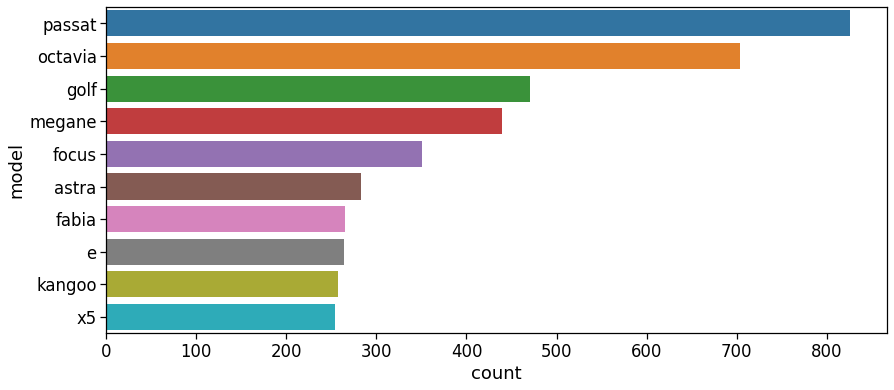

In [16]:
plt.figure(figsize=(14, 6))
sns.countplot(y="model", data=df, order = df['model'].value_counts().iloc[:10].index)


## How old are most popular cars?
Customers usually tried to sell 7-12 years old cars

<AxesSubplot:xlabel='count', ylabel='year'>

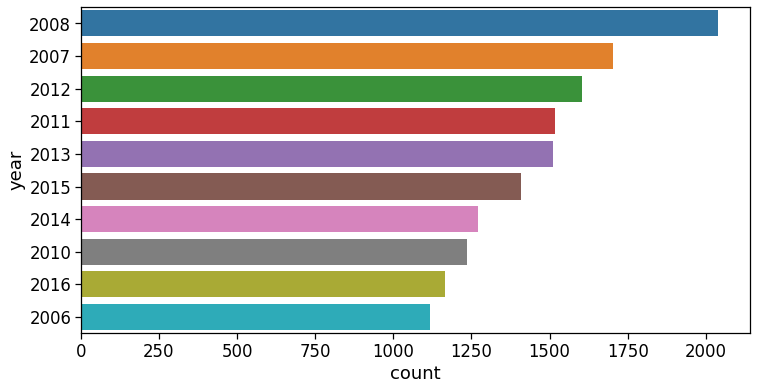

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(y="year", data=df, order = df['year'].value_counts().iloc[:10].index)


## Most popular body type
Ukrainian car owners usually sell sedans, crossovers and station wagons

<AxesSubplot:xlabel='count', ylabel='body'>

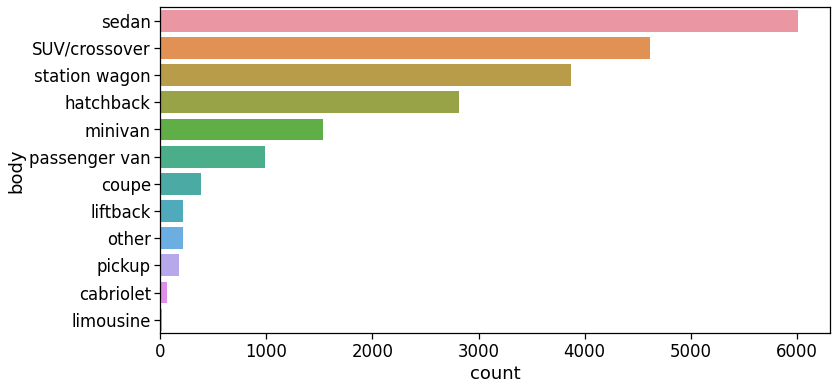

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y="body", data=df, order = df['body'].value_counts().index)


## Fuel type
Ukrainian drivers use diesel and petrol in equal proportions, and gas is rising as a cheaper alternative in recent years.

<AxesSubplot:xlabel='count', ylabel='fuel'>

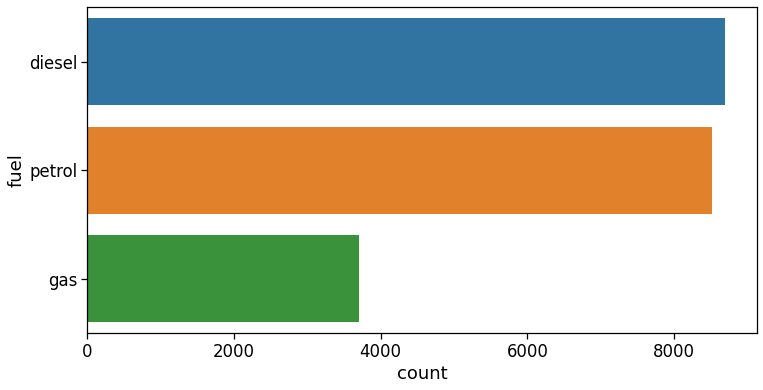

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(y="fuel", data=df, order = df['fuel'].value_counts().index)

## Transmission
Manual transmission is still the most popular one, but automatic is almost equal to it

<AxesSubplot:xlabel='count', ylabel='transmission'>

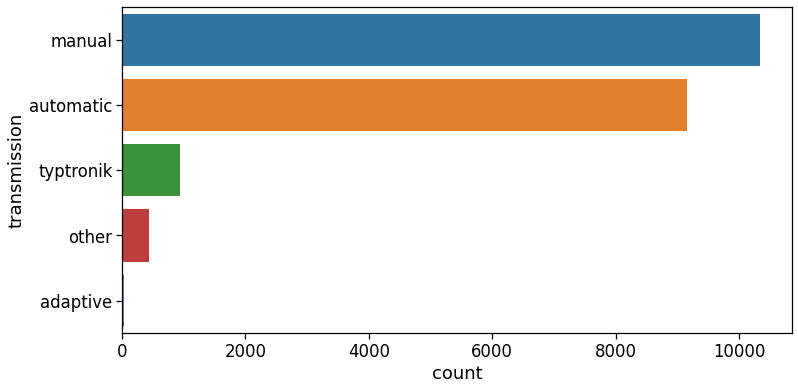

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(y="transmission", data=df, order = df['transmission'].value_counts().index)

## Car mileage
Ukrainian drivers usually sell cars with 150-250 thousands km mileage

<AxesSubplot:xlabel='count', ylabel='car_mileage'>

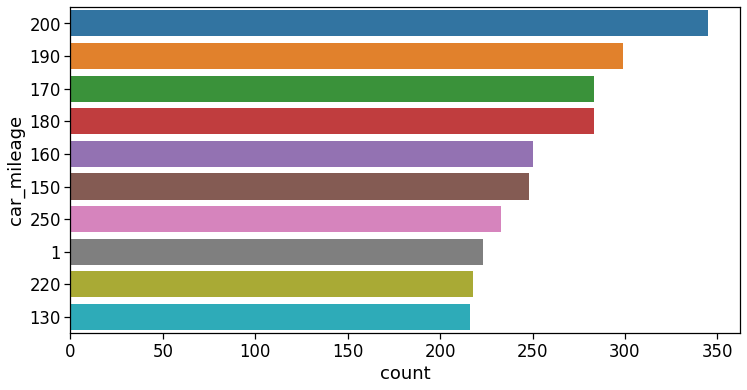

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y="car_mileage", data=df, order = df['car_mileage'].value_counts().iloc[:10].index)
   

## Power
On this graph you can see a variety of engines on the Ukrainian cars market

<AxesSubplot:xlabel='count', ylabel='power'>

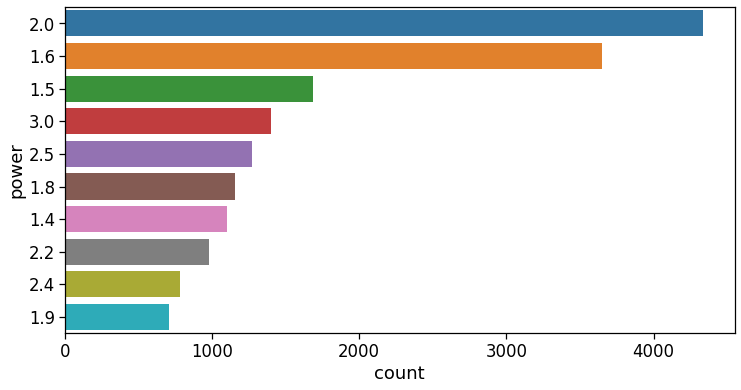

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(y="power", data=df, order = df['power'].value_counts().iloc[:10].index)

# Biulding a prediction model

### Preliminary testing
In order to have some idea about parameters that are most important for prediction, we can plot our numeric variables on a heatplot in order to observe correlations. As you can see below, price has a pretty significant positive correlation with year of production and engine power.

<AxesSubplot:>

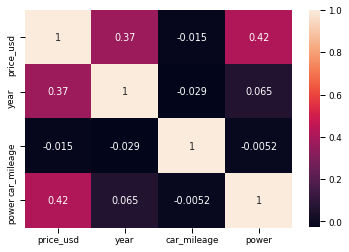

In [23]:
columns_heatmap = ['price_usd', 'year', 'car_mileage', 'power']
df_heatmap = df[columns_heatmap]
sns.set_context('paper')
sns.heatmap(df_heatmap.corr(),  annot=True)

### Data selection
For the prediction of car's price we will use next columns:'brand', 'model', 'year', 'body', 'car_mileage', 'fuel', 'power', 'transmission'. We will use 'price_usd' column as a label. Now we need to transform non-numerical values into 'dummy variables' in order to use them in our prediction models. Also, we will convert categorical variables into dummy-variables in order to use them in prediction models.

In [24]:
cols = ['brand', 'model', 'year', 'body', 'car_mileage', 'fuel', 'power', 'transmission']       
df_p = df[cols]
df_p.shape
# 

(20909, 8)

In [25]:
# select all categorical variables
cars_categorical = df_p.select_dtypes(include=['object'])
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
# drop categorical variables 
df_p = df_p.drop(list(cars_categorical.columns), axis=1)
# scale numerical variables
cols_ = df_p.columns
df_p = pd.DataFrame(scale(df_p))
df_p.columns = cols_
# concat dummy variables with numerical
df_p = pd.concat([df_p, cars_dummies], axis=1)
print(df_p.head())
print(df_p.shape)

       year  car_mileage     power  brand_alfa  brand_audi  brand_bentley  \
0 -0.538205     0.000245 -0.132463           0           0              0   
1  1.265240    -0.002401  0.181714           0           0              0   
2  0.937341    -0.018275 -0.551366           0           0              0   
3 -1.521903     0.023763  0.286440           0           0              0   
4  0.117593     0.136059  0.914794           0           0              0   

   brand_bmw  brand_brilliance  brand_buick  brand_byd  ...  \
0          0                 0            0          0  ...   
1          0                 0            0          0  ...   
2          0                 0            0          0  ...   
3          0                 0            0          0  ...   
4          0                 0            0          0  ...   

   body_passenger van  body_pickup  body_sedan  body_station wagon  fuel_gas  \
0                   0            0           0                   0         0  

**Here we will split our data into train and test sets. For a better calculation speed we will first use 10% of data for training and 1% of data for testing**

In [26]:
data = df_p
values = df.price_usd
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(data, values, test_size=0.01, train_size=0.1, random_state = 1)

**On the next cell we will import our prediction modules**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score

### Models testing
Now we will test our prediction models on our data and will choose the best one. We will use r2_score for the initial assesement.

### Logistic regression

In [28]:
log_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
log_predictions = log_model.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=log_predictions))

0.8140951599174854


### Linear regression

In [29]:
linr_model = LinearRegression()
linr_model.fit(X_train, Y_train)
linr_predictions = linr_model.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=linr_predictions))

-4.009843470870629e+23


## K-Nearest Neighbors

In [30]:
knn_model = KNeighborsClassifier(n_neighbors = 75).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=knn_predictions))


0.9130797897179056


**Here we check for the best k-value**

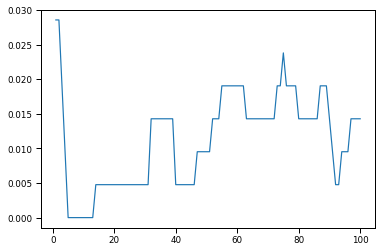

In [31]:
scores = []
for k in range(1, 101):
    knn_model = KNeighborsClassifier(n_neighbors = k, weights='uniform').fit(X_train, Y_train)
    scores.append(knn_model.score(X_val, Y_val))

plt.plot(range(1, 101), scores)

## Decision Tree

In [32]:
tree_model = DecisionTreeClassifier().fit(X_train, Y_train) 
tree_predictions = tree_model.predict(X_val) 
print(r2_score(y_true=Y_val, y_pred=tree_predictions))

0.8830024311335948


Since decision trees tend to overfit, we check for a maximum depth. As you can see, the value of 35 points on overfitting.

In [33]:
tree_model.get_depth()

33

### Decision tree with maximum depth of 20

In [34]:
tree_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
tree_predictions20 = tree_model20.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=tree_predictions20))


0.7678816855567888


## Random Forest Classifier

In [35]:
rf_classifier = RandomForestClassifier(n_estimators = 500, random_state = 0)
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=rf_predictions))

0.7464564186714914


## Support Vector Machine

In [36]:
svc_classifier = SVC(C=0.7, kernel = 'poly', degree=1)

svc_classifier.fit(X_train, Y_train) 
svc_predictions = svc_classifier.predict(X_val)

print(r2_score(y_true=Y_val, y_pred=svc_predictions))

0.9558710224460831


## Best results
The best results that we achieved were from K-Nearest Neighbour (r2=0.913) and Support Vector Machine (r2=0.956) models. Let's try to improve these models and check if they are still good with a big dataset.

## Weights
Let's check parameter 'weights' of KNN model. We will test two options 'uniform' and 'distance'

In [37]:
knn_model = KNeighborsClassifier(n_neighbors = 75, weights='uniform').fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=knn_predictions))

0.9130797897179056


In [38]:
knn_model = KNeighborsClassifier(n_neighbors = 75, weights='distance').fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=knn_predictions))

0.8401922774780183


## Split data again
Now we will test the whole dataset (around 20 000 rows) in order to see how our models perform. We will change train size to 80% and test size to 20%.

In [39]:

X_train, X_val, Y_train, Y_val = train_test_split(data, values, test_size=0.2, train_size=0.8, random_state = 1)

## K-Nearest Neighbors on a full dataset, weights='uniform'
Here you can see selection of the best k-value, r2_score and a list of real - predicted values

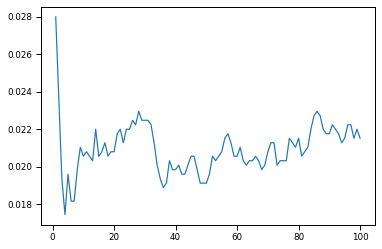

In [40]:
scores = []
for k in range(1, 101):
    knn_model = KNeighborsClassifier(n_neighbors = k, weights='uniform').fit(X_train, Y_train)
    scores.append(knn_model.score(X_val, Y_val))

plt.plot(range(1, 101), scores)

In [41]:
knn_model = KNeighborsClassifier(n_neighbors = 3, weights='uniform').fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=knn_predictions))
print(list(zip(Y_val, knn_predictions))[1:10])

0.9580843366805816
[(4700, 5400), (7500, 7500), (4400, 4499), (3000, 3000), (8300, 5200), (8250, 7950), (4500, 3800), (13750, 15200), (9100, 9500)]


## K-Nearest Neighbors on a full dataset, weights='distance'
Here you can see selection of the best k-value, r2_score and a list of real - predicted values

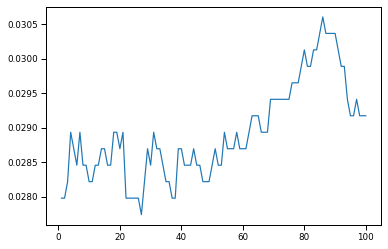

In [45]:
scores = []
for k in range(1, 101):
    knn_model = KNeighborsClassifier(n_neighbors = k, weights='distance').fit(X_train, Y_train)
    scores.append(knn_model.score(X_val, Y_val))

plt.plot(range(1, 101), scores)

In [43]:
knn_model = KNeighborsClassifier(n_neighbors = 90, weights='distance').fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_val)
print(r2_score(y_true=Y_val, y_pred=knn_predictions))
print(list(zip(Y_val, knn_predictions))[1:10])

0.9604586412823694
[(4700, 5600), (7500, 7500), (4400, 5200), (3000, 3500), (8300, 5200), (8250, 8300), (4500, 5100), (13750, 15200), (9100, 9800)]


## Support Vector Machine on a full dataset, C=0.7
Here you can see r2_score and a list of real - predicted values

In [44]:
svc_classifier = SVC(C=0.7, kernel = 'poly', degree=1)

svc_classifier.fit(X_train, Y_train) 
svc_predictions = svc_classifier.predict(X_val)

print(r2_score(y_true=Y_val, y_pred=svc_predictions))
print(list(zip(Y_val, svc_predictions))[1:10])

0.9080820573319963
[(4700, 5500), (7500, 7500), (4400, 6500), (3000, 4500), (8300, 7500), (8250, 7500), (4500, 7500), (13750, 13500), (9100, 9500)]


## Testing on a real data
Here we woll test our prediction models on a small dataset from 2021 scraped from the same website "auto.ria.com"

In [152]:
df_2021 = pd.read_csv('vehicle_price_2021.csv', encoding='utf-8')
df_2021


,brand,model,year,body,price_usd,car_mileage,fuel,power,transmission
0,volkswagen,caddy,2017,minivan,11900,225,diesel,2.0,manual
1,volkswagen,golf,2004,hatchback,5950,165,petrol,1.6,manual
2,volkswagen,golf,2008,hatchback,7490,167,petrol,1.4,manual
3,bmw,320,2008,sedan,8350,213,petrol,2.0,manual
4,ford,focus,2010,hatchback,6750,173,diesel,1.6,manual
5,volkswagen,passat,2011,station wagon,11400,242,diesel,2.0,automatic
6,volkswagen,passat,2014,sedan,11900,121,gas,1.8,automatic
7,renault,megane,2011,hatchback,8599,147,diesel,1.5,automatic
8,nissan,qashqai,2008,SUV/crossover,9000,248,diesel,1.5,manual
9,audi,a6,2008,sedan,11599,194,diesel,2.7,automatic


## Data processing
Here we will process data in the same way as we did for the training set

In [153]:
df_comb = pd.concat([df, df_2021], axis=0, ignore_index=True)
print(df_comb.shape)

(20919, 10)


In [154]:
cols_2021 = ['brand', 'model', 'year', 'body', 'car_mileage', 'fuel', 'power', 'transmission']       
data_2021 = df_comb[cols_2021]

In [155]:
# select all categorical variables
cars_categorical_2021 = data_2021.select_dtypes(include=['object'])
# convert into dummies
cars_dummies_2021 = pd.get_dummies(cars_categorical_2021, drop_first=True)
# drop categorical variables 
data_2021 = data_2021.drop(list(cars_categorical_2021.columns), axis=1)
# scale numerical variables
cols_2021 = data_2021.columns
data_2021 = pd.DataFrame(scale(data_2021))
data_2021.columns = cols_2021
# concat dummy variables with numerical
data_2021 = pd.concat([data_2021, cars_dummies_2021], axis=1)
print(data_2021.shape)

(20919, 975)


In [138]:
data_2021_select = data_2021[-10:]

In [141]:
values_2021 = df_2021.price_usd

### Running models on the real world data

In [142]:
knn_model = KNeighborsClassifier(n_neighbors = 3, weights='uniform').fit(X_train, Y_train)
knn_predictions = knn_model.predict(data_2021_select)
print(r2_score(y_true=values_2021, y_pred=knn_predictions))
print(list(zip(values_2021, knn_predictions)))

0.6506740294997173
[(11900, 11950), (5950, 5999), (7490, 6500), (8350, 8500), (6750, 6200), (11400, 8500), (11900, 10500), (8599, 7000), (9000, 9200), (11599, 10300)]


In [145]:
knn_model = KNeighborsClassifier(n_neighbors = 90, weights='distance').fit(X_train, Y_train)
knn_predictions = knn_model.predict(data_2021_select)
print(r2_score(y_true=values_2021, y_pred=knn_predictions))
print(list(zip(values_2021, knn_predictions)))

-1.656338189243936
[(11900, 21900), (5950, 6550), (7490, 7700), (8350, 5500), (6750, 6700), (11400, 8500), (11900, 11900), (8599, 8500), (9000, 9200), (11599, 9500)]


In [146]:
svc_classifier = SVC(C=0.7, kernel = 'poly', degree=1)

svc_classifier.fit(X_train, Y_train) 
svc_predictions = svc_classifier.predict(data_2021_select)

print(r2_score(y_true=values_2021, y_pred=svc_predictions))
print(list(zip(values_2021, svc_predictions)))

0.2875013247259669
[(11900, 11300), (5950, 6500), (7490, 6500), (8350, 5500), (6750, 7500), (11400, 8500), (11900, 10500), (8599, 7500), (9000, 6500), (11599, 9500)]


In [147]:
predicted_price = [11950, 5999, 6500, 8500, 6200, 8500, 10500, 7000, 9200, 10300]

## Final results
Here are the final data with the real and predicted prices (KNeighborsClassifier(n_neighbors = 3, weights='uniform')). As you can see from the prices, some predictions were very accurate. The current model can be improved by carefull choosing of parameters for training, removing outliers and changing 'other' values to something more meaningfull. 

In [148]:
df_2021['predicted_price'] = predicted_price
df_2021

,brand,model,year,body,price_usd,car_mileage,fuel,power,transmission,predicted_price
0,volkswagen,caddy,2017,minivan,11900,225,diesel,2.0,manual,11950
1,volkswagen,golf,2004,hatchback,5950,165,petrol,1.6,manual,5999
2,volkswagen,golf,2008,hatchback,7490,167,petrol,1.4,manual,6500
3,bmw,320,2008,sedan,8350,213,petrol,2.0,manual,8500
4,ford,focus,2010,hatchback,6750,173,diesel,1.6,manual,6200
5,volkswagen,passat,2011,station wagon,11400,242,diesel,2.0,automatic,8500
6,volkswagen,passat,2014,sedan,11900,121,gas,1.8,automatic,10500
7,renault,megane,2011,hatchback,8599,147,diesel,1.5,automatic,7000
8,nissan,qashqai,2008,SUV/crossover,9000,248,diesel,1.5,manual,9200
9,audi,a6,2008,sedan,11599,194,diesel,2.7,automatic,10300


## Thanks for your attention!



Oleksandr Shulha

sashastereo@ukr.net

19.01.2021